<a href="https://colab.research.google.com/github/lookB4Uleap/PROJECT_SENTIMENT_ANALYSIS/blob/main/SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from google.colab import files

# files.upload()

# Importing Dataset

In [ ]:
tweets_df=pd.read_csv("https://raw.githubusercontent.com/lookB4Uleap/project_Twiiter_Sentiment_Analysis/main/train.csv")
tweets_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [ ]:
tweets_df=tweets_df.drop(['id'],axis = 1)
tweets_df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


# Preprocessing

In [ ]:
import re
clean_desc = []
for i in range(len(tweets_df['tweet'])) :
    desc = tweets_df['tweet'][i].lower()
    
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    desc = re.sub('&lt;/?.*?&gt;', '&lt;&gt;', desc)
    
    desc = re.sub('(\\d|\\W)+', ' ', desc)
    
    desc = re.sub('user', '', desc)
    
    clean_desc.append(desc)
tweets_df['tweet'] = clean_desc
tweets_df.head()

,label,tweet
0,0,when a father is dysfunctional and is so sel...
1,0,thanks for lyft credit i can t use cause th...
2,0,bihday your majesty
3,0,model i love u take with u all the time in ur
4,0,factsguide society now motivation


### Checking Subjectivity and Polarity of the tweets

In [ ]:
from textblob import TextBlob

tweet_blob = [TextBlob(tweet) for tweet in tweets_df['tweet']]
tweets_df['polarity'] = [blob.sentiment.polarity for blob in tweet_blob]
tweets_df['subjectivity'] = [blob.sentiment.subjectivity for blob in tweet_blob]
tweets_df.head()

,label,tweet,polarity,subjectivity
0,0,when a father is dysfunctional and is so sel...,-0.5,1.0
1,0,thanks for lyft credit i can t use cause th...,0.2,0.2
2,0,bihday your majesty,0.0,0.0
3,0,model i love u take with u all the time in ur,0.5,0.6
4,0,factsguide society now motivation,0.0,0.0


Polarity : -1 to 1
*   -1 -> negative
*   0 -> neutral
*   1 -> positive

---
Subjectivity : 0 to 1

*   0 -> Objective in nature
*   1 -> Subjective in nature





In [ ]:
# sns.heatmap(tweets_df.isnull(),yticklabels=False,cbar=False,cmap="Blues")

### PLotting the Subjectivity and Polarity

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff637ae0290>,
      dtype=object)

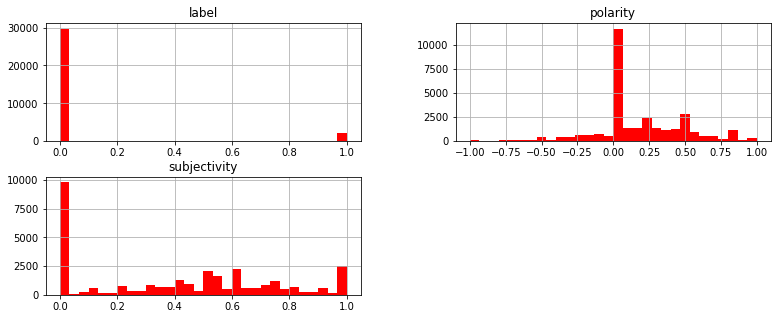

In [ ]:
tweets_df.hist(bins=30,figsize=(13,5),color='r')

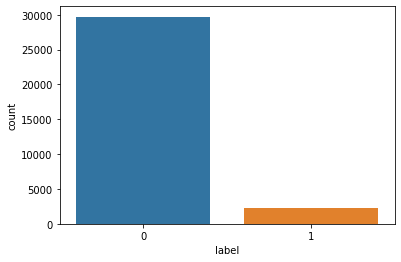

In [ ]:
sns.countplot(x=tweets_df['label'],label='Count')

In [ ]:
tweets_df['length']=tweets_df['tweet'].apply(len)
tweets_df.head()

,label,tweet,polarity,subjectivity,length
0,0,when a father is dysfunctional and is so sel...,-0.5,1.0,93
1,0,thanks for lyft credit i can t use cause th...,0.2,0.2,106
2,0,bihday your majesty,0.0,0.0,20
3,0,model i love u take with u all the time in ur,0.5,0.6,47
4,0,factsguide society now motivation,0.0,0.0,34


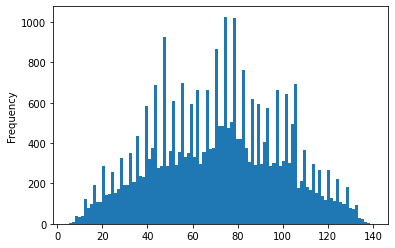

In [ ]:
tweets_df['length'].plot(bins=100,kind='hist')

In [ ]:
tweets_df.describe()

,label,polarity,subjectivity,length
count,31962.000000,31962.000000,31962.000000,31962.000000
mean,0.070146,0.157925,0.400088,71.598492
std,0.255397,0.320553,0.335340,27.998382
min,0.000000,-1.000000,0.000000,5.000000
25%,0.000000,0.000000,0.000000,50.000000
50%,0.000000,0.025000,0.429630,73.000000
75%,0.000000,0.388542,0.646667,93.000000
max,1.000000,1.000000,1.000000,140.000000


In [ ]:
positive=tweets_df[tweets_df['label']==0]
positive.head()

,label,tweet,polarity,subjectivity,length
0,0,when a father is dysfunctional and is so sel...,-0.5,1.0,93
1,0,thanks for lyft credit i can t use cause th...,0.2,0.2,106
2,0,bihday your majesty,0.0,0.0,20
3,0,model i love u take with u all the time in ur,0.5,0.6,47
4,0,factsguide society now motivation,0.0,0.0,34


In [ ]:
negative=tweets_df[tweets_df['label']==1]
negative.head()

,label,tweet,polarity,subjectivity,length
13,1,cnn calls michigan middle school build the w...,0.00,0.0,61
14,1,no comment in australia opkillingbay seashephe...,0.00,0.0,90
17,1,retweet if you agree,0.00,0.0,21
23,1,lumpy says i am a prove it lumpy,0.00,0.0,36
34,1,it s unbelievable that in the st century we d ...,-0.25,1.0,97


In [ ]:
sentences=tweets_df['tweet'].tolist()
len(sentences)

31962

In [ ]:
sentences_as_one_string=" ".join(sentences)

### Plotting World Cloud

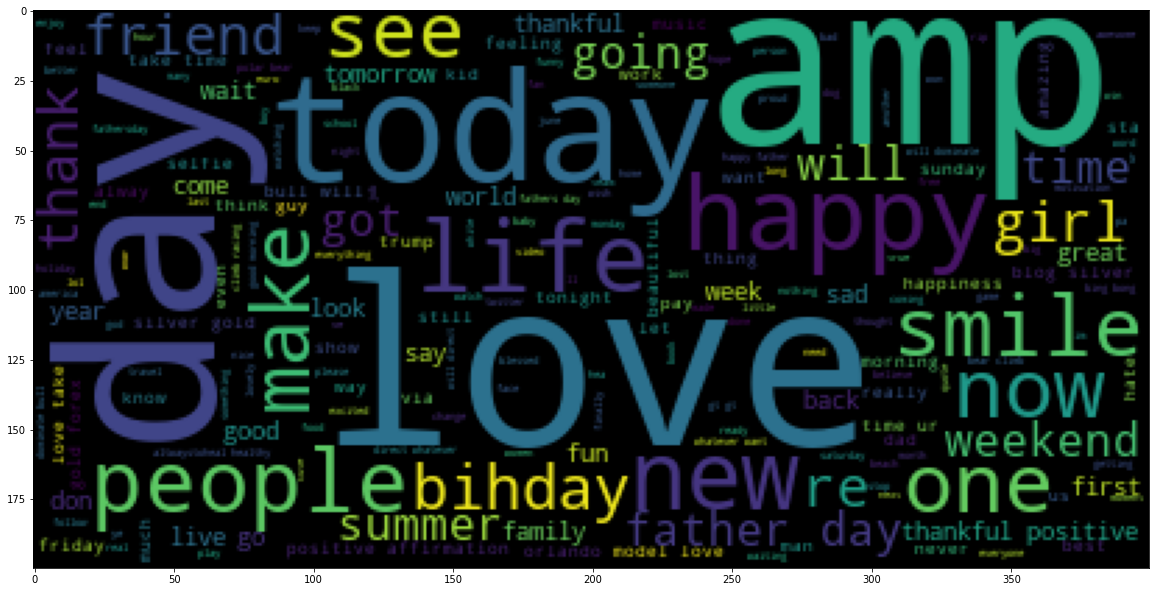

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [ ]:
negative_list = negative['tweet'].tolist()

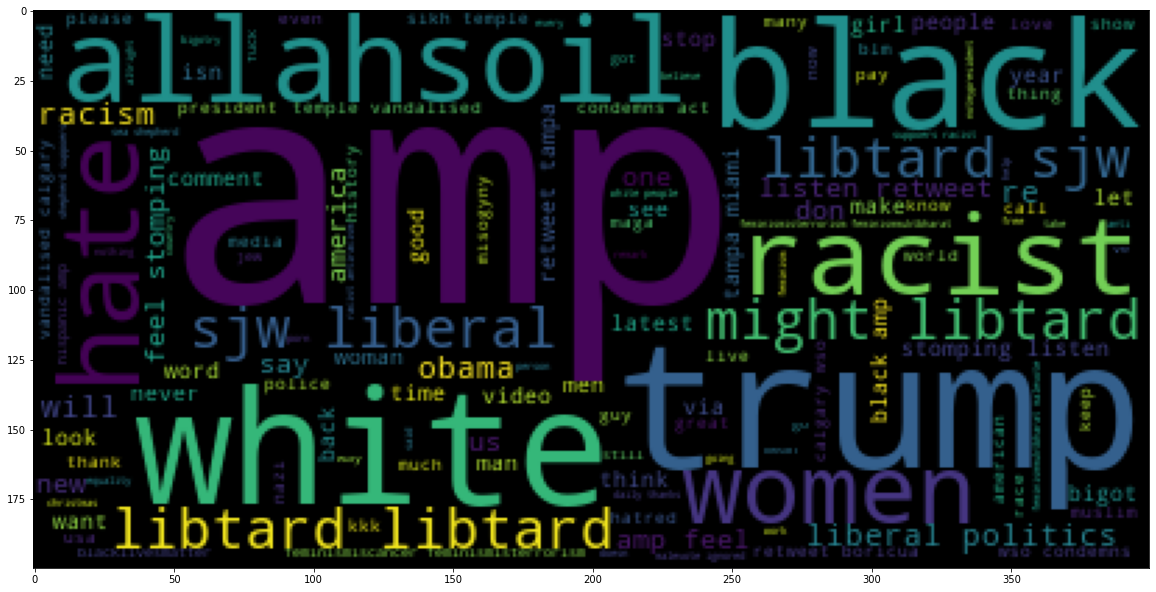

In [ ]:
negative_sentences_as_one_string = " ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

# Removing stopwords

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
# stopwords.words('english')

In [ ]:
pos_tweets = tweets_df[tweets_df['label'] == 0]
neg_tweets = tweets_df[tweets_df['label'] == 1]

pos_tweets = pos_tweets.iloc[0:2500]
print(pos_tweets.shape)
print(neg_tweets.shape)

eq_label_df = pd.concat([pos_tweets, neg_tweets])
print(eq_label_df.shape)
# eq_label_df.head()

tweets_df = eq_label_df
tweets_df.head()

(2500, 5)
(2242, 5)
(4742, 5)


,label,tweet,polarity,subjectivity,length
0,0,when a father is dysfunctional and is so sel...,-0.5,1.0,93
1,0,thanks for lyft credit i can t use cause th...,0.2,0.2,106
2,0,bihday your majesty,0.0,0.0,20
3,0,model i love u take with u all the time in ur,0.5,0.6,47
4,0,factsguide society now motivation,0.0,0.0,34


In [ ]:
tweets_df.shape

(4742, 5)

In [ ]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation and (char.isalnum() or char.isspace())]
    # Test_punc_removed = [char for char in Test_punc_removed if char.isalnum()]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [ word for word in Test_punc_removed_join.split() if word.lower not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [ ]:
tweets_df_clean=tweets_df['tweet'].apply(message_cleaning)
print(tweets_df['tweet'][5])
print(tweets_df_clean[5])

 huge fan fare and big talking before they leave chaos and pay disputes when they get there allshowandnogo 
['huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there', 'allshowandnogo']


In [ ]:
print(tweets_df_clean[5:20])

5     [huge, fan, fare, and, big, talking, before, t...
6                            [camping, tomorrow, danny]
7     [the, next, school, year, is, the, year, for, ...
8     [we, won, love, the, land, allin, cavs, champi...
9                  [welcome, here, i, m, it, s, so, gr]
10    [ireland, consumer, price, index, mom, climbed...
11    [we, are, so, selfish, orlando, standwithorlan...
12    [i, get, to, see, my, daddy, today, days, gett...
15    [ouch, junior, is, angry, got, junior, yugyoem...
16    [i, am, thankful, for, having, a, paner, thank...
18    [its, friday, smiles, all, around, via, ig, co...
19    [as, we, all, know, essential, oils, are, not,...
20    [euro, people, blaming, ha, for, conceded, goa...
21    [sad, little, dude, badday, coneofshame, cats,...
22    [product, of, the, day, happy, man, wine, tool...
Name: tweet, dtype: object


# 'Create & Test Model' Function

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score
def trainTestModel(model, tweets_encoded) :
  X_train,X_test,y_train,y_test = train_test_split(
      tweets_encoded,
      tweets_df['label'].values,
      test_size = 0.25, 
      stratify = tweets_df['label'].values)
  model.fit(X_train,y_train)
  y_predict_test = model.predict(X_test)
  print("F1 score : {:.3f}".format(f1_score(y_test, y_predict_test)))
  cm = confusion_matrix(y_test, y_predict_test)
  sns.heatmap(cm,annot = True)  
  print(classification_report(y_test, y_predict_test))
  return model

# Encoding Methods

## Bag-of-Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = CountVectorizer(analyzer=message_cleaning,dtype = 'uint8', max_features = 20000).fit_transform(tweets_df['tweet']).toarray()
tweets_countvectorizer.shape

(4742, 10938)

In [ ]:
print(tweets_countvectorizer.shape)
print(tweets_df['label'].shape)

(4742, 10938)
(4742,)


F1 score : 0.834
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       625
           1       0.82      0.85      0.83       561

    accuracy                           0.84      1186
   macro avg       0.84      0.84      0.84      1186
weighted avg       0.84      0.84      0.84      1186



MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6, 5, 7), random_state=42,
              solver='lbfgs')

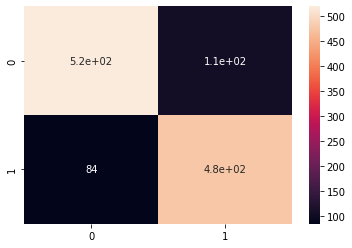

In [ ]:
# Neural Network - Multi Layer Perceptron
from sklearn.neural_network import MLPClassifier
trainTestModel(MLPClassifier(
    solver='adam', alpha=1e-5,
    hidden_layer_sizes=(6, 5, 7),
    random_state=42), tweets_countvectorizer)

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tweets_tfidfvectorizer = TfidfVectorizer(max_features = 20000).fit_transform(tweets_df['tweet']).toarray()
tweets_tfidfvectorizer.shape

(4742, 10913)

In [ ]:
print(tweets_tfidfvectorizer.shape)
print(tweets_df['label'].shape)

(4742, 10913)
(4742,)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


F1 score : 0.830
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       625
           1       0.82      0.84      0.83       561

    accuracy                           0.84      1186
   macro avg       0.84      0.84      0.84      1186
weighted avg       0.84      0.84      0.84      1186



MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6, 5, 7), random_state=42,
              solver='lbfgs')

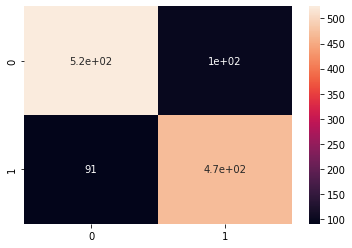

In [ ]:
# Neural Network - Multi Layer Perceptron
from sklearn.neural_network import MLPClassifier
trainTestModel(MLPClassifier(
    solver='adam', alpha=1e-5,
    hidden_layer_sizes=(6, 5, 7),
    random_state=42), tweets_tfidfvectorizer)

## Word2Vec

In [ ]:
!pip install gensim

In [ ]:
import gensim
from gensim.models import Word2Vec

tokenized_tweets = []
tokenized_tweets = tweets_df['tweet'].apply(lambda x:x.split())

# # for i in range(len(tokenized_tweets)) :
# #   print(tokenized_tweets[i])

# tweets_df['tweet'][0]
tokenized_tweets = pd.DataFrame(tokenized_tweets)


In [ ]:
tokenized_tweets.head()

,tweet
0,"[when, a, father, is, dysfunctional, and, is, ..."
1,"[thanks, for, lyft, credit, i, can, t, use, ca..."
2,"[bihday, your, majesty]"
3,"[model, i, love, u, take, with, u, all, the, t..."
4,"[factsguide, society, now, motivation]"


In [ ]:
# tokenized_tweets
model_w2v = Word2Vec(tokenized_tweets['tweet'].tolist(), size=2000, window=5, min_count=2, seed=34)
model_w2v.train(tokenized_tweets['tweet'].tolist(), total_examples=len(tweets_df['tweet']), epochs = 20)

(872851, 1213780)

In [ ]:
model_w2v.wv.most_similar(positive = "fox")

[('myanmar', 0.9954779744148254),
 ('cannon', 0.9947655200958252),
 ('speaks', 0.9938898086547852),
 ('nonsensical', 0.9927833676338196),
 ('arrest', 0.9910538196563721),
 ('blacktwitter', 0.9907016754150391),
 ('renowned', 0.9906396269798279),
 ('ad', 0.990431547164917),
 ('metal', 0.9903266429901123),
 ('yrs', 0.9899368286132812)]

In [ ]:
def word_vectors(tokens,size):
  vec = np.zeros(size).reshape((1, size))
  count = 0
  for word in tokens:
    try:
      vec += model_w2v[word].reshape((1, size))
      count += 1
    except KeyError:
      continue
  if count != 0 :
    vec /= count
  return vec

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_tweets['tweet'].tolist()), 2000))

for i in range(len(tokenized_tweets['tweet'].tolist())):
  wordvec_arrays[i,:] = word_vectors(tokenized_tweets['tweet'].tolist()[i], 2000)
wordvec_df = pd.DataFrame(wordvec_arrays)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
wordvec_arrays.shape

(4742, 2000)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


F1 score : 0.791
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       625
           1       0.77      0.81      0.79       561

    accuracy                           0.80      1186
   macro avg       0.80      0.80      0.80      1186
weighted avg       0.80      0.80      0.80      1186



MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6, 5, 7), random_state=42,
              solver='lbfgs')

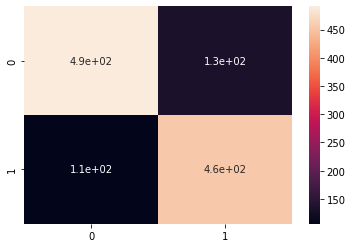

In [ ]:
# Neural Network - Multi Layer Perceptron
from sklearn.neural_network import MLPClassifier
trainTestModel(MLPClassifier(
    solver='adam', alpha=1e-5,
    hidden_layer_sizes=(6, 5, 7),
    random_state=42), wordvec_arrays)

# Model Evaluations

F1 score : 0.882
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       625
           1       0.88      0.88      0.88       561

    accuracy                           0.89      1186
   macro avg       0.89      0.89      0.89      1186
weighted avg       0.89      0.89      0.89      1186



MultinomialNB()

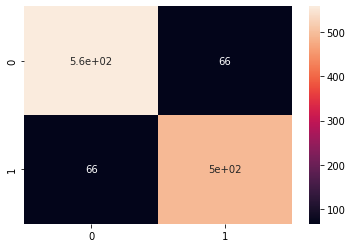

In [ ]:
# Multinomial Naive Bayes 
from sklearn.naive_bayes import MultinomialNB
trainTestModel(MultinomialNB(), tweets_tfidfvectorizer)

F1 score : 0.683
              precision    recall  f1-score   support

           0       0.70      0.92      0.80       625
           1       0.87      0.56      0.68       561

    accuracy                           0.75      1186
   macro avg       0.79      0.74      0.74      1186
weighted avg       0.78      0.75      0.74      1186



XGBClassifier()

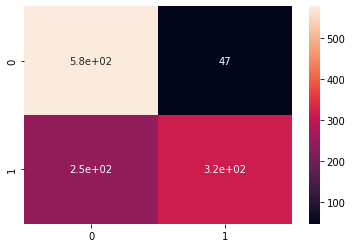

In [ ]:
# XG-Boost Classifier
from xgboost import XGBClassifier
trainTestModel(XGBClassifier(), tweets_tfidfvectorizer)

F1 score : 0.768
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       625
           1       0.87      0.69      0.77       561

    accuracy                           0.80      1186
   macro avg       0.82      0.80      0.80      1186
weighted avg       0.81      0.80      0.80      1186



RandomForestClassifier(n_estimators=10, random_state=0)

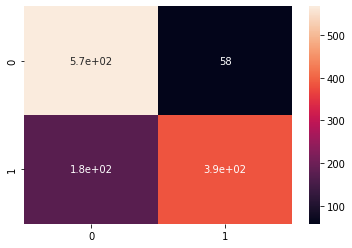

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
trainTestModel(RandomForestClassifier(
    n_estimators=10,
    max_depth=None,
    min_samples_split=2,
    random_state=0), tweets_tfidfvectorizer)

F1 score : 0.849
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       625
           1       0.87      0.83      0.85       561

    accuracy                           0.86      1186
   macro avg       0.86      0.86      0.86      1186
weighted avg       0.86      0.86      0.86      1186



MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6, 5, 7), random_state=42,
              solver='lbfgs')

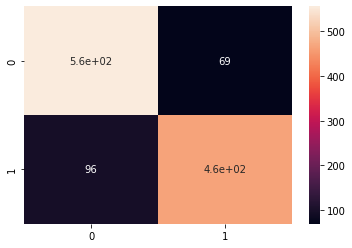

In [ ]:
# Neural Network - Multi Layer Perceptron
from sklearn.neural_network import MLPClassifier
trainTestModel(MLPClassifier(
    solver='adam', alpha=1e-5,
    hidden_layer_sizes=(6, 5, 7),
    random_state=42), tweets_tfidfvectorizer)

F1 score : 0.877
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       625
           1       0.86      0.89      0.88       561

    accuracy                           0.88      1186
   macro avg       0.88      0.88      0.88      1186
weighted avg       0.88      0.88      0.88      1186



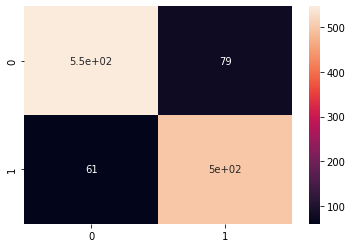

In [ ]:
# Stacked Model of the above mentioned models
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
estimators = [('multiNB', MultinomialNB()),
              ('xgb', XGBClassifier()),
              ('rf', RandomForestClassifier(
                  n_estimators=10, 
                  max_depth=None, 
                  min_samples_split=2, 
                  random_state=0)),
              ('mlp', MLPClassifier(
                  solver='adam', 
                  alpha=1e-5,
                  hidden_layer_sizes=(6, 5, 7), 
                  random_state=42,
                  max_iter = 300))]
final_estimator = MLPClassifier(
                  solver='lbfgs', 
                  alpha=1e-5,
                  hidden_layer_sizes=(4, 3, 2), 
                  random_state=42)
model_stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter = 200))
final_model = trainTestModel(model_stack, tweets_tfidfvectorizer)

# Saving Model

In [ ]:
# import joblib

# joblib.dump(final_model , '/content/drive/MyDrive/Models/TARP/TARP_model')

['/content/drive/MyDrive/Models/TARP/TARP_model']